In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')
sub=pd.read_csv('data/sample_submission.csv')

In [5]:
train.columns = [col.replace(' ', '_') for col in train.columns]
test.columns = [col.replace(' ', '_') for col in test.columns]
train.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working_Professional_or_Student', 'Profession', 'Academic_Pressure',
       'Work_Pressure', 'CGPA', 'Study_Satisfaction', 'Job_Satisfaction',
       'Sleep_Duration', 'Dietary_Habits', 'Degree',
       'Have_you_ever_had_suicidal_thoughts_?', 'Work/Study_Hours',
       'Financial_Stress', 'Family_History_of_Mental_Illness', 'Depression'],
      dtype='object')

In [6]:
print(train.dtypes,"\n\n",test.dtypes)

id                                         int64
Name                                      object
Gender                                    object
Age                                      float64
City                                      object
Working_Professional_or_Student           object
Profession                                object
Academic_Pressure                        float64
Work_Pressure                            float64
CGPA                                     float64
Study_Satisfaction                       float64
Job_Satisfaction                         float64
Sleep_Duration                            object
Dietary_Habits                            object
Degree                                    object
Have_you_ever_had_suicidal_thoughts_?     object
Work/Study_Hours                         float64
Financial_Stress                         float64
Family_History_of_Mental_Illness          object
Depression                                 int64
dtype: object 

 id 

In [ ]:
sleep = {
        "More than 8 hours":9,
        'Less than 5 hours':4,
        '5-6 hours':5.5,
        '7-8 hours':7.5,
        '1-2 hours':1.5,
        '6-8 hours':7,
        '4-6 hours':5,
        '6-7 hours':6.5,
        '10-11 hours':10.5,
        '8-9 hours':8.5,
        '9-11 hours':10,
        '2-3 hours':2.5,
        '3-4 hours':3.5,
        'Moderate':6,
        '4-5 hours':4.5,
        '9-6 hours':7.5,
        '1-3 hours':2,
        '1-6 hours':4,
        '8 hours':8,
        '10-6 hours':8,
        'Unhealthy':3,
        'Work_Study_Hours':6,
        '3-6 hours':3.5,
        '9-5':7,
        '9-5 hours':7,
}

train['Sleep_Duration'] = train['Sleep_Duration'].map(sleep)
test['Sleep_Duration'] = test['Sleep_Duration'].map(sleep)

In [8]:
sleep_med = train['Sleep_Duration'].median()
train.fillna({'Sleep_Duration':sleep_med}, inplace=True)
test.fillna({'Sleep_Duration':sleep_med}, inplace=True)

In [9]:
print('Gender:',train['Gender'].unique())
print('Thoughts:',train['Have_you_ever_had_suicidal_thoughts_?'].unique())
print('Working:',train['Working_Professional_or_Student'].unique())
print('History:',train['Family_History_of_Mental_Illness'].unique())

Gender: ['Female' 'Male']
Thoughts: ['No' 'Yes']
Working: ['Working Professional' 'Student']
History: ['No' 'Yes']


In [10]:
gender={
    'Male':0,
    'Female':1,
}

work={
    'Working Professional':1,
    'Student':0,
}

Thoughts={
    'No':0,
    'Yes':1,
}

History={
    'No':0,
    'Yes':1,
}

train['Working_Professional_or_Student'] = train['Working_Professional_or_Student'].map(work)
test['Working_Professional_or_Student'] = test['Working_Professional_or_Student'].map(work)

train['Gender'] = train['Gender'].map(gender)
test['Gender'] = test['Gender'].map(gender)

train['Have_you_ever_had_suicidal_thoughts_?'] = train['Have_you_ever_had_suicidal_thoughts_?'].map(Thoughts)
test['Have_you_ever_had_suicidal_thoughts_?'] = test['Have_you_ever_had_suicidal_thoughts_?'].map(Thoughts)

train['Family_History_of_Mental_Illness'] = train['Family_History_of_Mental_Illness'].map(History)
test['Family_History_of_Mental_Illness'] = test['Family_History_of_Mental_Illness'].map(History)

print('Gender:',train['Gender'].unique(),'Working:',train['Working_Professional_or_Student'].unique(),'Thoughts:',train['Have_you_ever_had_suicidal_thoughts_?'].unique(),'History:',train['Family_History_of_Mental_Illness'].unique())

Gender: [1 0] Working: [1 0] Thoughts: [0 1] History: [0 1]


In [11]:
train['Work_Hours'] = train.apply(
    lambda row: np.nan if pd.isna(row['Work/Study_Hours']) 
    else row['Work/Study_Hours'] if row['Working_Professional_or_Student'] == 1
    else 0,
    axis=1
)

train['Study_Hours'] = train.apply(
    lambda row: np.nan if pd.isna(row['Work/Study_Hours']) 
    else row['Work/Study_Hours'] if row['Working_Professional_or_Student'] == 0
    else 0,
    axis=1
)


test['Work_Hours'] = test.apply(
    lambda row: np.nan if pd.isna(row['Work/Study_Hours']) 
    else row['Work/Study_Hours'] if row['Working_Professional_or_Student'] == 1
    else 0,
    axis=1
)

test['Study_Hours'] = test.apply(
    lambda row: np.nan if pd.isna(row['Work/Study_Hours']) 
    else row['Work/Study_Hours'] if row['Working_Professional_or_Student'] == 0
    else 0,
    axis=1
)


train.drop(['Work/Study_Hours'], axis=1, inplace=True)
test.drop(['Work/Study_Hours'], axis=1, inplace=True)

In [12]:
train['Academic_Pressure'] = train.apply(
    lambda row: 0 if row['Working_Professional_or_Student'] == 1
    else (np.nan if pd.isna(row['Academic_Pressure']) else row['Academic_Pressure']),
    axis=1
)

test['Academic_Pressure'] = test.apply(
    lambda row: 0 if row['Working_Professional_or_Student'] == 1
    else (np.nan if pd.isna(row['Academic_Pressure']) else row['Academic_Pressure']),
    axis=1
)


train['Work_Pressure'] = train.apply(
    lambda row: 0 if row['Working_Professional_or_Student'] == 0
    else (np.nan if pd.isna(row['Work_Pressure']) else row['Work_Pressure']),
    axis=1
)

test['Work_Pressure'] = test.apply(
    lambda row: 0 if row['Working_Professional_or_Student'] == 0
    else (np.nan if pd.isna(row['Work_Pressure']) else row['Work_Pressure']),
    axis=1
)

In [13]:
diet = {
    'More Healty':0,
    'Healthy':1,
    'Less than Healthy':2,
    'Less Healthy':2,
    'Moderate':3,
    'Unhealthy':4,   
    'No Healthy':4,
}

train['Dietary_Habits'] = train['Dietary_Habits'].map(diet)
test['Dietary_Habits'] = test['Dietary_Habits'].map(diet)

train['Dietary_Habits'].unique()

array([ 1.,  4.,  3., nan,  2.])

In [14]:
degree = {
    "BCom": "B.Com", "B.Com": "B.Com", "B.Comm": "B.Com",
    "B.Tech": "B.Tech", "BTech": "B.Tech", "B.T": "B.Tech",
    "BSc": "B.Sc", "B.Sc": "B.Sc", "Bachelor of Science": "B.Sc",
    "BArch": "B.Arch", "B.Arch": "B.Arch",
    "BA": "B.A", "B.A": "B.A",
    "BBA": "BBA", "BB": "BBA",
    "BCA": "BCA",
    "BE": "BE",
    "BEd": "B.Ed", "B.Ed": "B.Ed",
    "BPharm": "B.Pharm", "B.Pharm": "B.Pharm",
    "BHM": "BHM",
    "LLB": "LLB", "LL B": "LLB", "LL BA": "LLB", "LL.Com": "LLB", "LLCom": "LLB",
    "MCom": "M.Com", "M.Com": "M.Com",
    "M.Tech": "M.Tech", "MTech": "M.Tech", "M.T": "M.Tech",
    "MSc": "M.Sc", "M.Sc": "M.Sc", "Master of Science": "M.Sc",
    "MBA": "MBA",
    "MCA": "MCA",
    "MD": "MD",
    "ME": "ME",
    "MEd": "M.Ed", "M.Ed": "M.Ed",
    "MArch": "M.Arch", "M.Arch": "M.Arch",
    "MPharm": "M.Pharm", "M.Pharm": "M.Pharm",
    "MA": "MA", "M.A": "MA",
    "MPA": "MPA",
    "LLM": "LLM",
    "PhD": "PhD",
    "MBBS": "MBBS",
    "CA": "CA",
    "Class 12": "Class 12", "12th": "Class 12",
    "Class 11": "Class 11", "11th": "Class 11"
}

train['Degree'] = train['Degree'].map(degree)
test['Degree'] = test['Degree'].map(degree)

train['Degree'].unique()

array(['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'B.Sc', 'ME',
       'B.Arch', 'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', nan,
       'B.A', 'Class 12', 'M.Tech', 'PhD', 'M.Ed', 'M.Sc', 'B.Tech',
       'LLM', 'MBBS', 'M.Pharm', 'MPA', 'Class 11', 'M.Arch'],
      dtype=object)

In [15]:
print(train.isnull().sum(),"\n\n",test.isnull().sum())

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working_Professional_or_Student               0
Profession                                36630
Academic_Pressure                             9
Work_Pressure                                20
CGPA                                     112802
Study_Satisfaction                       112803
Job_Satisfaction                          27910
Sleep_Duration                                0
Dietary_Habits                               24
Degree                                     3379
Have_you_ever_had_suicidal_thoughts_?         0
Financial_Stress                              4
Family_History_of_Mental_Illness              0
Depression                                    0
Work_Hours                                    0
Study_Hours                             

In [16]:
nanlist=['Work_Hours','Study_Hours','Profession','Academic_Pressure','Work_Pressure',
         'CGPA','Study_Satisfaction','Job_Satisfaction','Dietary_Habits','Degree','Financial_Stress']

In [17]:
for col in nanlist:
    napercent = (train[col].isna().sum()/train[col].shape[0])*100
    print(f"{col} is %{napercent:.2f} null")

Work_Hours is %0.00 null
Study_Hours is %0.00 null
Profession is %26.03 null
Academic_Pressure is %0.01 null
Work_Pressure is %0.01 null
CGPA is %80.17 null
Study_Satisfaction is %80.17 null
Job_Satisfaction is %19.84 null
Dietary_Habits is %0.02 null
Degree is %2.40 null
Financial_Stress is %0.00 null


In [18]:
train['Work_Stress'] = train.apply(
    lambda row:(row['Financial_Stress'] + row['Work_Pressure'] - row['Job_Satisfaction'])if row['Working_Professional_or_Student'] == 1 
    else 0,
    axis=1
)

train['Academic_Stress'] = train.apply(
    lambda row:(row['Financial_Stress'] + row['Academic_Pressure'] - row['Study_Satisfaction'])if row['Working_Professional_or_Student'] == 0 
    else 0,
    axis=1
)

test['Work_Stress'] = test.apply(
    lambda row:(row['Financial_Stress'] + row['Work_Pressure'] - row['Job_Satisfaction'])if row['Working_Professional_or_Student'] == 1 
    else 0,
    axis=1
)

test['Academic_Stress'] = test.apply(
    lambda row:(row['Financial_Stress'] + row['Academic_Pressure'] - row['Study_Satisfaction'])if row['Working_Professional_or_Student'] == 0 
    else 0,
    axis=1
)

In [19]:
nanlist = ['Work_Stress','Academic_Stress','Work_Hours','Study_Hours','Profession',
         'Academic_Pressure','Work_Pressure','CGPA','Study_Satisfaction','Job_Satisfaction',
         'Dietary_Habits','Degree','Financial_Stress']

In [20]:
for col in nanlist:
    print(f"{col}:",train[col].dtype)

Work_Stress: float64
Academic_Stress: float64
Work_Hours: float64
Study_Hours: float64
Profession: object
Academic_Pressure: float64
Work_Pressure: float64
CGPA: float64
Study_Satisfaction: float64
Job_Satisfaction: float64
Dietary_Habits: float64
Degree: object
Financial_Stress: float64


In [21]:
train.fillna({'Degree': 'Unknown', 'Profession': 'Unknown'}, inplace=True)
test.fillna({'Degree': 'Unknown', 'Profession': 'Unknown'}, inplace=True)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from category_encoders import TargetEncoder

n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
target_encoder = TargetEncoder(cols=['Profession', 'Degree'])

for train_index, val_index in kf.split(train, train['Depression']):
    train_fold = train.iloc[train_index]
    val_fold = train.iloc[val_index]
    train_fold_encoded = target_encoder.fit_transform(train_fold[['Profession', 'Degree']], train_fold['Depression'])
    val_fold_encoded = target_encoder.transform(val_fold[['Profession', 'Degree']])
    train.loc[val_index, ['Profession', 'Degree']] = val_fold_encoded

test_encoded = target_encoder.transform(test[['Profession', 'Degree']])
test[['Profession', 'Degree']] = test_encoded

In [25]:
mean_n = train.groupby('Name')['Depression'].mean()
train['Name'] = train['Name'].map(mean_n)
test['Name'] = test['Name'].map(mean_n)

mean_n = train.groupby('City')['Depression'].mean()
train['City'] = train['City'].map(mean_n)
test['City'] = test['City'].map(mean_n)

In [26]:
for col in nanlist:
    med = train[col].median()
    train.fillna({col:med}, inplace=True)
    test.fillna({col:med}, inplace=True)

print(train.isnull().sum(),"\n\n",test.isnull().sum())

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working_Professional_or_Student          0
Profession                               0
Academic_Pressure                        0
Work_Pressure                            0
CGPA                                     0
Study_Satisfaction                       0
Job_Satisfaction                         0
Sleep_Duration                           0
Dietary_Habits                           0
Degree                                   0
Have_you_ever_had_suicidal_thoughts_?    0
Financial_Stress                         0
Family_History_of_Mental_Illness         0
Depression                               0
Work_Hours                               0
Study_Hours                              0
Work_Stress                              0
Academic_Stress                          0
dtype: int6

In [ ]:
newnan = ["Name","City"]

for col in newnan:
    med = train[col].median()
    test.fillna({col:med}, inplace=True)

test.isnull().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working_Professional_or_Student          0
Profession                               0
Academic_Pressure                        0
Work_Pressure                            0
CGPA                                     0
Study_Satisfaction                       0
Job_Satisfaction                         0
Sleep_Duration                           0
Dietary_Habits                           0
Degree                                   0
Have_you_ever_had_suicidal_thoughts_?    0
Financial_Stress                         0
Family_History_of_Mental_Illness         0
Work_Hours                               0
Study_Hours                              0
Work_Stress                              0
Academic_Stress                          0
dtype: int64

In [28]:
train.head()

,id,Name,Gender,Age,City,Working_Professional_or_Student,Profession,Academic_Pressure,Work_Pressure,CGPA,...,Dietary_Habits,Degree,Have_you_ever_had_suicidal_thoughts_?,Financial_Stress,Family_History_of_Mental_Illness,Depression,Work_Hours,Study_Hours,Work_Stress,Academic_Stress
0,0,0.194621,1,49.0,0.192690,1,0.181716,0.0,5.0,7.77,...,1.0,0.181716,0,2.0,0,0,1.0,0.0,5.0,0.0
1,1,0.186916,0,26.0,0.142206,1,0.181716,0.0,4.0,7.77,...,4.0,0.181716,1,3.0,0,1,7.0,0.0,4.0,0.0
2,2,0.172603,0,33.0,0.159196,0,0.181757,5.0,0.0,8.97,...,1.0,0.181705,1,1.0,0,1,0.0,3.0,0.0,4.0
3,3,0.172603,0,22.0,0.131293,1,0.181708,0.0,5.0,7.77,...,3.0,0.181708,1,1.0,1,1,10.0,0.0,5.0,0.0
4,4,0.180361,1,30.0,0.125739,1,0.181716,0.0,1.0,7.77,...,4.0,0.181716,1,4.0,1,0,9.0,0.0,4.0,0.0


In [29]:
id_col_tra = train['id']
train.drop(['id'],axis = 1, inplace = True)
id_col_test = test['id']
test.drop(['id'],axis = 1, inplace = True)

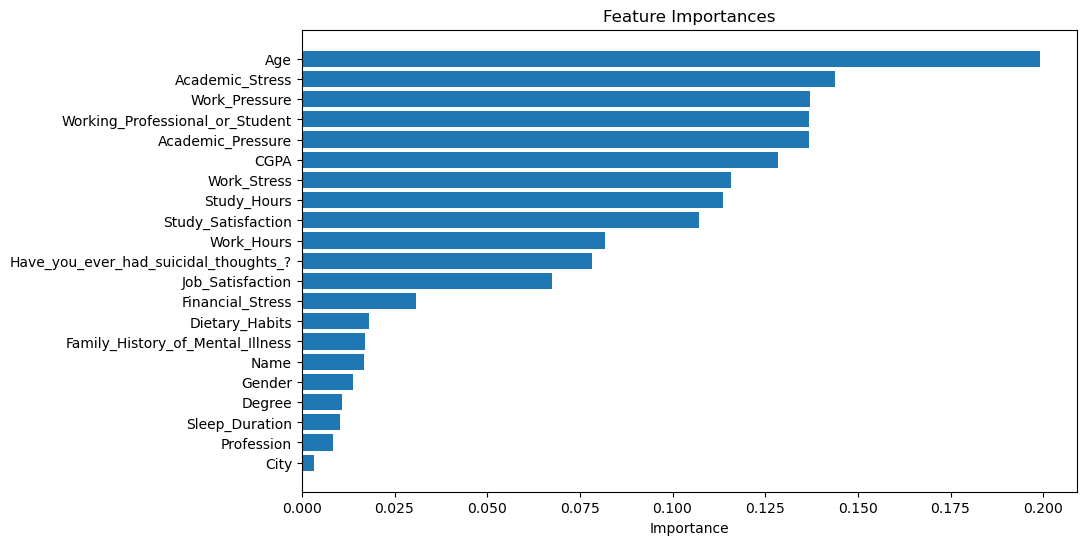

In [30]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(train.drop('Depression', axis=1), train['Depression'])
mi_series = pd.Series(mi, index=train.drop('Depression', axis=1).columns)

feature_importance = pd.DataFrame({
    'Feature': train.drop('Depression', axis=1).columns,
    'Importance': mi_series
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

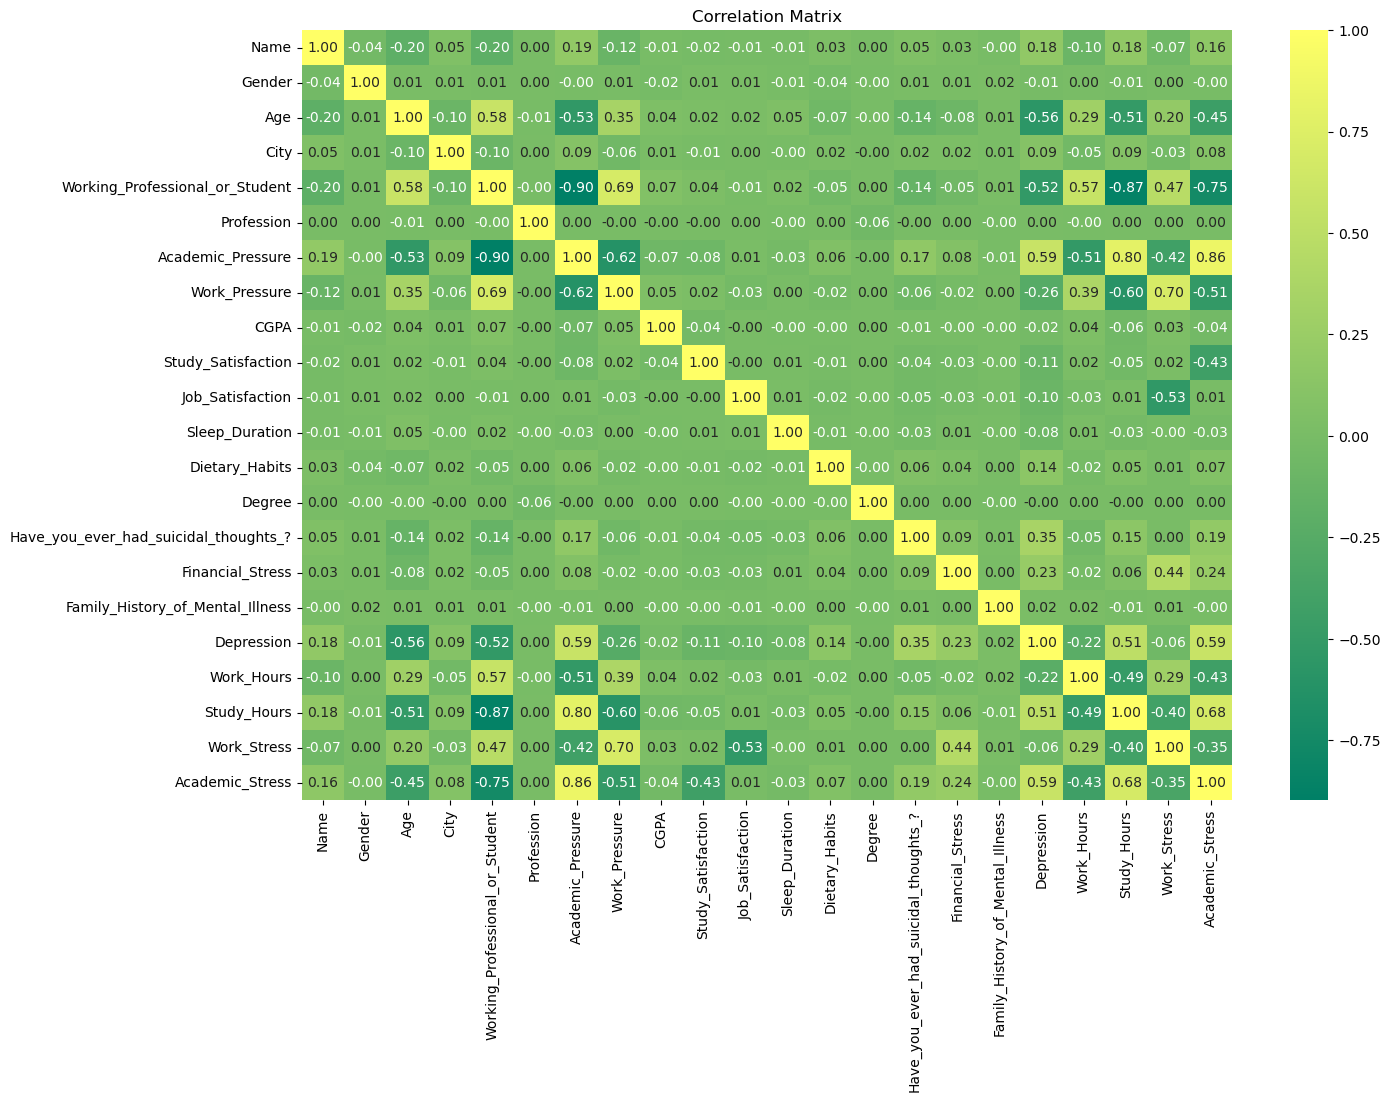

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(), annot=True, cmap='summer',fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import xgboost as xgb
import optuna
from sklearn.preprocessing import StandardScaler

In [35]:
y = train['Depression']
train = train.drop(['Depression'],axis=1)
X = train

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1205) # 607

def objective(trial):
    colsample_bytree= trial.suggest_float('colsample_bytree',0.5,1)
    n_estimators = trial.suggest_int('n_estimators', 600,5000)
    learning_rate = trial.suggest_float('learning_rate', 0.07,0.1)
    reg_lambda = trial.suggest_float('reg_lambda', 0,1)
    reg_alpha = trial.suggest_float('reg_alpha', 1,3)
    max_depth = trial.suggest_int('max_depth', 8,15)
    gamma = trial.suggest_float('gamma', 0.2,0.5)
    eval_metric = 'auc'
    
    model = XGBClassifier(
    colsample_bytree = colsample_bytree,
    n_estimators = n_estimators,
    learning_rate = learning_rate,
    max_depth = max_depth,
    reg_alpha = reg_alpha,
    reg_lambda = reg_lambda,
    gamma = gamma,
    eval_metric = 'auc',
    random_state = 1205 # 607
)
    model.fit(X_train, y_train)
    score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    return score

In [48]:
study = optuna.create_study(direction = 'maximize',
                            sampler = optuna.samplers.RandomSampler(seed=1205)) # 607
optuna.logging.set_verbosity(optuna.logging.WARNING)

def log_best_trial(study, trial):
    if study.best_trial == trial:
        print(f"New best trial: {trial.number} with value: {trial.value} and params: {trial.params}")


study.optimize(objective, n_trials=300,callbacks=[log_best_trial])

New best trial: 0 with value: 0.9750533384942486 and params: {'colsample_bytree': 0.6296561408841352, 'n_estimators': 2248, 'learning_rate': 0.08237722150119452, 'reg_lambda': 0.8013692030386275, 'reg_alpha': 2.73877328721818, 'max_depth': 8, 'gamma': 0.4451132965390333}
New best trial: 22 with value: 0.9750564353156199 and params: {'colsample_bytree': 0.6658170497638869, 'n_estimators': 4840, 'learning_rate': 0.07351075975317817, 'reg_lambda': 0.6301239043005336, 'reg_alpha': 2.0317423433608384, 'max_depth': 9, 'gamma': 0.4780961465026678}
New best trial: 31 with value: 0.9753108425943888 and params: {'colsample_bytree': 0.5964713370428103, 'n_estimators': 3735, 'learning_rate': 0.07912710648382802, 'reg_lambda': 0.5821953510991249, 'reg_alpha': 1.6703405154273478, 'max_depth': 8, 'gamma': 0.42904113799625804}
New best trial: 192 with value: 0.975319380122538 and params: {'colsample_bytree': 0.551712051424305, 'n_estimators': 4684, 'learning_rate': 0.0928791017073319, 'reg_lambda': 0.

In [49]:
best_params = study.best_params
best_score = study.best_value
print(f"Best Hyperparameters: {best_params}")
print(f"Best Accuracy: {best_score:.6f}")

Best Hyperparameters: {'colsample_bytree': 0.551712051424305, 'n_estimators': 4684, 'learning_rate': 0.0928791017073319, 'reg_lambda': 0.5160832290319445, 'reg_alpha': 1.9141597019966066, 'max_depth': 8, 'gamma': 0.3139399617415471}
Best Accuracy: 0.975319


In [50]:
optuna.visualization.plot_param_importances(study)

In [51]:
best_params = study.best_params
best_score = study.best_value
print(f"Best Hyperparameters: {best_params}")
print(f"Best Accuracy: {best_score:.6f}")

n_estimators = best_params['n_estimators']
reg_alpha = best_params['reg_alpha']
learning_rate = best_params['learning_rate']
reg_lambda = best_params['reg_lambda']
max_depth = best_params['max_depth']
colsample_bytree = best_params['colsample_bytree']
gamma = best_params['gamma']

Best Hyperparameters: {'colsample_bytree': 0.551712051424305, 'n_estimators': 4684, 'learning_rate': 0.0928791017073319, 'reg_lambda': 0.5160832290319445, 'reg_alpha': 1.9141597019966066, 'max_depth': 8, 'gamma': 0.3139399617415471}
Best Accuracy: 0.975319


In [52]:
best_xgb=XGBClassifier(
    colsample_bytree = colsample_bytree,
    n_estimators = n_estimators,
    learning_rate = learning_rate,
    reg_alpha = reg_alpha,
    reg_lambda = reg_lambda,
    max_depth = max_depth,
    gamma = gamma,
    eval_metric = 'auc',
    random_state = 1205) # 607

eval_set = [(X_train, y_train), (X_test, y_test)]

best_xgb.fit(X_train,y_train,eval_set=eval_set,verbose=False)

y_pred = best_xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1])
print(roc_auc)

accuracy: 0.9404
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     23038
           1       0.85      0.82      0.83      5102

    accuracy                           0.94     28140
   macro avg       0.90      0.89      0.90     28140
weighted avg       0.94      0.94      0.94     28140

0.975319380122538


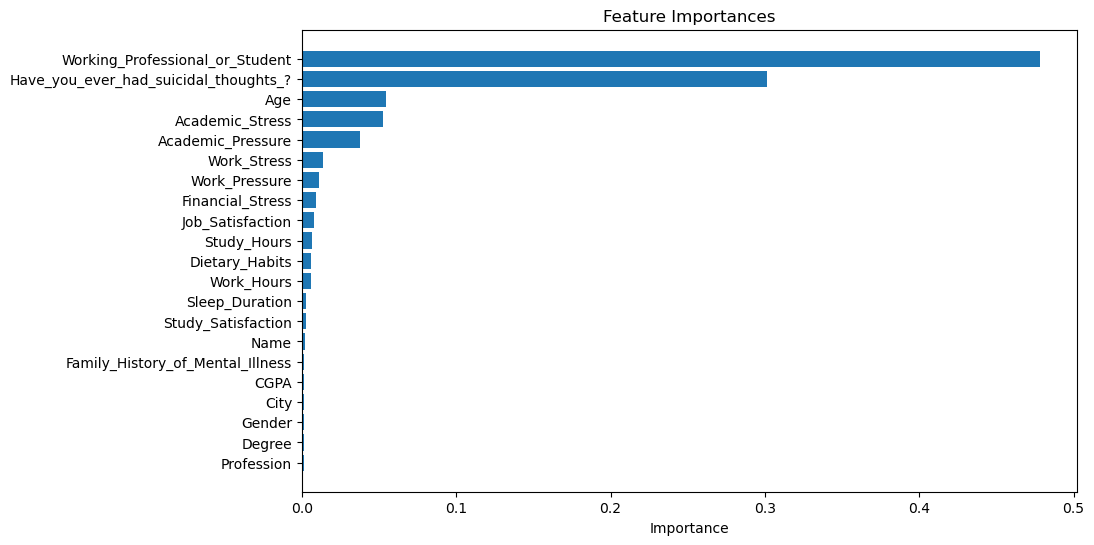

In [56]:
feature_importance = pd.DataFrame({
    'Feature': train.columns,
    'Importance': best_xgb.feature_importances_
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

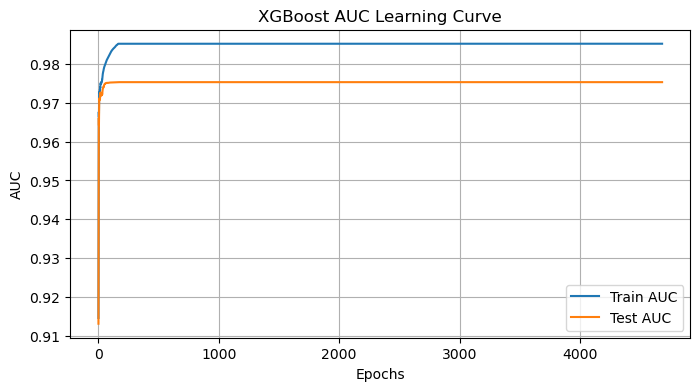

In [54]:
results = best_xgb.evals_result()

epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)

plt.figure(figsize=(8,4))
plt.plot(x_axis, results['validation_0']['auc'], label='Train AUC')
plt.plot(x_axis, results['validation_1']['auc'], label='Test AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.title('XGBoost AUC Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
x_test_df = test[X_train.columns]
y_test_pred = best_xgb.predict(x_test_df)
test['predicted'] = y_test_pred

print(test[['predicted']])

       predicted
0              0
1              0
2              0
3              1
4              0
...          ...
93795          0
93796          1
93797          0
93798          1
93799          0

[93800 rows x 1 columns]


In [57]:
sub["id"]=id_col_test
sub["Depression"]=test['predicted']
sub.to_csv('submission_Opt2.csv', index=False)
print(sub)
sub.info()

           id  Depression
0      140700           0
1      140701           0
2      140702           0
3      140703           1
4      140704           0
...       ...         ...
93795  234495           0
93796  234496           1
93797  234497           0
93798  234498           1
93799  234499           0

[93800 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id          93800 non-null  int64
 1   Depression  93800 non-null  int64
dtypes: int64(2)
memory usage: 1.4 MB
